In [24]:
%pylab inline
import warnings
import numpy as np
import matplotlib.pyplot as plt

import rayopt as ro

# ignore matplotlib and numpy warning each other
warnings.simplefilter("ignore", FutureWarning)
# ignore floating point exceptions
np.seterr(divide="ignore", invalid="ignore")
np.set_printoptions(precision=3)

Populating the interactive namespace from numpy and matplotlib


In [25]:
s = ro.system_from_yaml("""
object:
  pupil:
    radius: 10
elements:
- {}
- {distance: 10, material: 1.5, roc: 50}
- {distance: 2, material: 1.0}
- {}
""")
s.update()
print(s)

System: 
Scale: 1.0 mm
Wavelengths: 588, 656, 486 nm
Fields: 0
Object:
 Semi-Angle: 0°
 Pupil:
   Pupil Distance: 10
   Radius: 10
Image:
 Radius: inf
 Update Radius: True
 Pupil:
   Pupil Distance: -1.33333
   Update Radius: True
   Radius: inf
Stop: 1
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S          0        inf        inf              None     nan     nan     nan
 1 S         10         50        inf                 -   1.500   1.500     inf
 2 S          2        inf        inf                 -   1.000   1.000     inf
 3 S          0        inf        inf              None     nan     nan     nan



In [26]:
print([e.radius for e in s])
s.paraxial.resize()
print([e.radius for e in s])
s.resize_convex()
print([e.radius for e in s])

[inf, inf, inf, inf]
[inf, 10.0, 9.8666666666666671, 9.8666666666666671]
[inf, 10.0, 10.0, 9.8666666666666671]


System: 
Scale: 1.0 mm
Wavelengths: 588, 656, 486 nm
Fields: 0
Object:
 Semi-Angle: 0°
 Pupil:
   Pupil Distance: 10
   Radius: 10
Image:
 Radius: 9.87
 Update Radius: True
 Pupil:
   Pupil Distance: -1.33333
   Update Radius: True
   Radius: 10
Stop: 1
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S          0        inf        inf              None     nan     nan     nan
 1 S         10         50         20                 -   1.500   1.500     inf
 2 S          2        inf         20                 -   1.000   1.000     inf
 3 S     97.839        inf     19.733              None     nan     nan     nan

lagrange: -0
track length: 2
object, image height: [ 0.  0.]
petzval radius: 150
front, back focal length (from PP): [ nan  nan]
entry, exit pupil height: [ nan  nan]
entry, exit pupil distance: [ nan  nan]
front, back focal distance: [ nan  nan]
front, back principal distance: [ nan  nan]
front, back nodal distance: [ nan  nan]
fron

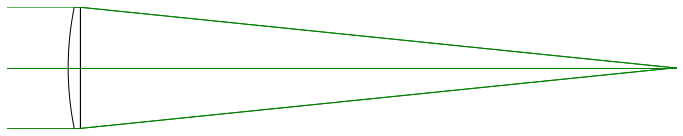

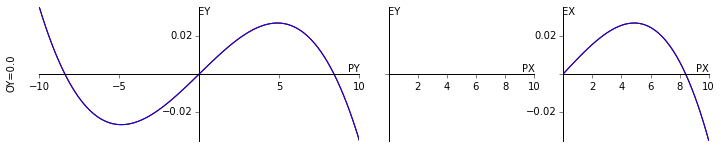

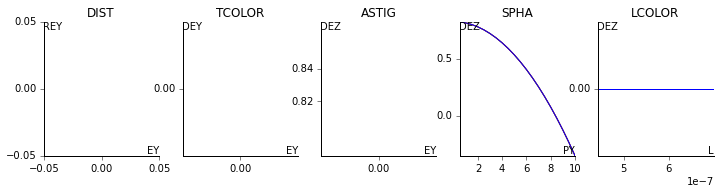

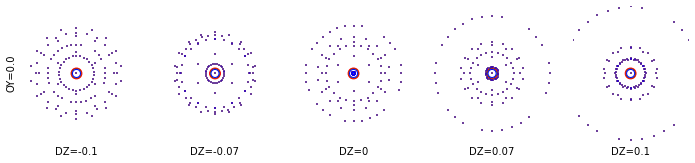

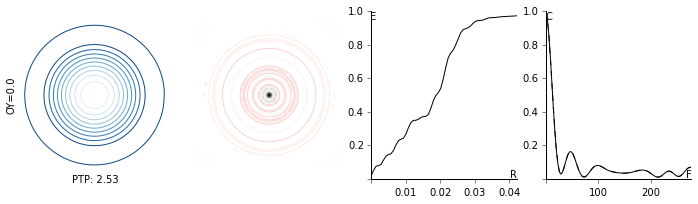

In [27]:
ro.Analysis(s)

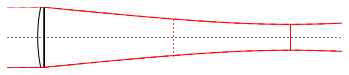

In [28]:
s.object.pupil.radius = .2
q = ro.GaussianTrace(s)
fig, ax = plt.subplots()
s.plot(ax)
q.plot(ax, color="red", scale=50)
s.object.pupil.radius = 10.

In [29]:
p = ro.PolyTrace(s, kmax=3)
print(p)

maximum order: 3
wavelength: 587.56

s1 : -1.14778e-04
s2 :  1.66231e-03
s3 : -4.92157e-01
s4 : -3.30574e-01
s5 :  3.70370e-01
m1 : -3.42432e-08
m2 :  1.53085e-06
m3 :  1.25683e-06
m4 : -3.77088e-04
m5 : -1.92520e-04
m6 : -3.15912e-05
m7 :  2.71552e-03
m8 : -5.32514e-03
m9 :  4.52957e-03
m10: -6.98997e-01
m11:  1.16326e-01
m12: -1.54321e-01

s1100: spherical aberration                 : -1.14778e-04
t1100: sagittal coma                        : -1.66231e-03
s2010: field curvature                      : -8.22730e-01
t2010: distortion                           : -3.70370e-01
s3001: meridional coma                      : -3.37981e-03
t3001: field curvature                      : -9.84313e-01
s4200: spherical aberration                 : -3.42432e-08
t4200: circular coma                        : -2.74019e-07
s5110: sagittal oblique spherical aberration: -1.92520e-04
t5110: meridional elliptical coma           : -8.04066e-03
s6101: circular coma                        : -2.51367e-06
t6101: 

In [30]:
print("\n".join(p.print_trace()))

S
  n  i  j  k            1            2            3
  0  0  0  0  1.00000e+00  9.86667e-01  8.27934e-03
  1  1  0  0  0.00000e+00  6.45926e-05 -1.14778e-04
  2  0  1  0  0.00000e+00 -7.40741e-03 -8.22730e-01
  3  0  0  1  0.00000e+00 -1.18519e-04 -3.37981e-03
  4  2  0  0  0.00000e+00  1.65333e-08 -3.42432e-08
  5  1  1  0  0.00000e+00  3.48642e-05 -1.92520e-04
  6  1  0  1  0.00000e+00  1.85284e-06 -2.51367e-06
  7  0  2  0  0.00000e+00  3.08642e-03  1.16326e-01
  8  0  1  1  0.00000e+00  3.03577e-20  9.05914e-03
  9  0  0  2  0.00000e+00 -7.90123e-07 -3.15912e-05

T
  n  i  j  k            1            2            3
  0  0  0  0  0.00000e+00  1.33333e+00  9.91721e+01
  1  1  0  0  1.00000e-02  3.22963e-03 -1.66231e-03
  2  0  1  0  0.00000e+00 -3.70370e-01 -3.70370e-01
  3  0  0  1  0.00000e+00 -5.92593e-03 -9.84313e-01
  4  2  0  0  1.00000e-06  8.26667e-07 -2.74019e-07
  5  1  1  0  0.00000e+00  1.74321e-03 -8.04066e-03
  6  1  0  1  2.00000e-04  9.26420e-05 -1.84568e-04
  7  0 

In [90]:
y = np.atleast_2d([10., 0, 0])
-s[1].surface_sag(y), p.stvwof[1, -1].view(p.Simplex)(*y.T[0]**2, [0.], [0.])

(array([ 1.01020514]), array([ 1.01]))